In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [3]:
# white and red wine datasets
white_wine_data = pd.read_csv(r'C:\Users\jasmi\Projects\Wine-Wizardry\Red & white wine datasets\wine-quality White.csv')
red_wine_data = pd.read_csv(r'C:\Users\jasmi\Projects\Wine-Wizardry\Red & white wine datasets\wine-quality Red.csv')


# Display first few rows 
white_wine_data.head(), red_wine_data.head()

(   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.0              0.27         0.36            20.7      0.045   
 1            6.3              0.30         0.34             1.6      0.049   
 2            8.1              0.28         0.40             6.9      0.050   
 3            7.2              0.23         0.32             8.5      0.058   
 4            7.2              0.23         0.32             8.5      0.058   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 45.0                 170.0   1.0010  3.00       0.45   
 1                 14.0                 132.0   0.9940  3.30       0.49   
 2                 30.0                  97.0   0.9951  3.26       0.44   
 3                 47.0                 186.0   0.9956  3.19       0.40   
 4                 47.0                 186.0   0.9956  3.19       0.40   
 
    alcohol  quality  
 0      8.8        6  
 1      9.5        6  
 2 

In [4]:
# Add 'wine_type' to distinguish between red and white
# white_wine_data['wine_type'] = 1
# red_wine_data['wine_type'] = 0


X = white_wine_data.drop(columns=['quality'])
y = white_wine_data['quality']


In [6]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y_adjusted, test_size=0.2, random_state=42)

y_train.value_counts()

quality
6    1766
5    1166
7     688
8     140
4     138
3      15
9       5
Name: count, dtype: int64

In [8]:
smote = SMOTE(random_state=42)
smote = SMOTE(k_neighbors=3)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
y_train_smote.value_counts()

quality
6    1766
5    1766
7    1766
3    1766
4    1766
8    1766
9    1766
Name: count, dtype: int64

In [9]:
# the scaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
rf_model=RandomForestClassifier()
# rf_model=RandomForestClassifier(class_weight='balanced')

In [11]:
rf_model = RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample', max_depth=20, max_features='log2', min_samples_leaf=1, 
                                  min_samples_split=2, n_estimators=500, random_state=42)
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
# grid_search.fit(X_train_pca, y_train)

# best_rf_model = grid_search.best_estimator_

In [12]:


# # train random forest
# rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# predict
y_pred = rf_model.predict(X_test)


In [13]:
# accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


accuracy

0.6755102040816326

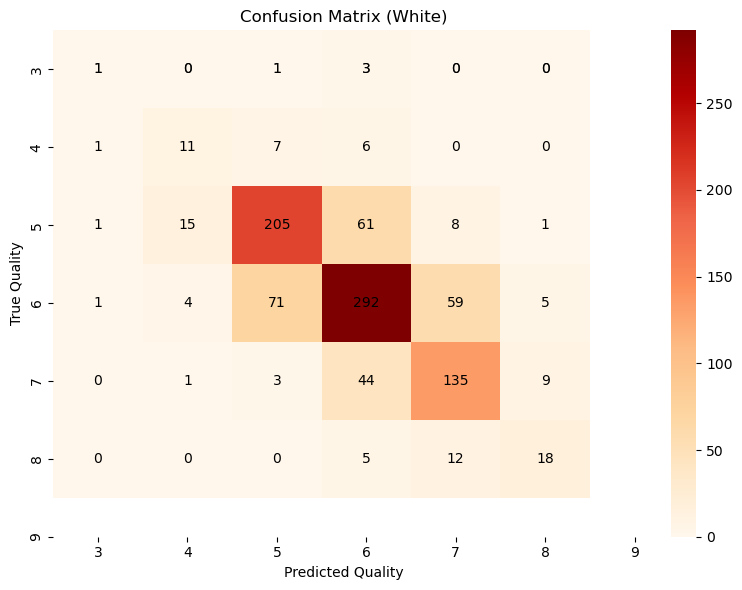

In [14]:
plt.figure(figsize=(8,6))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='OrRd', xticklabels=[3, 4, 5, 6, 7, 8,9], yticklabels=[3, 4, 5, 6, 7, 8,9])
ax.set_title('Confusion Matrix (White)')
ax.set_xlabel('Predicted Quality')
ax.set_ylabel('True Quality')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha='center', va='center', color='black')
plt.tight_layout()
plt.show()